###**Import Library**
Tahap ini dilakukan untuk memanggil seluruh library yang dibutuhkan untuk mengambil data hingga melakukan analisis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### **Import Data**

Data yang digunakan terbagi menjadi 3:


1.   Data vaksinasi
2.   Data wisatawan
3.   Data COVID-19



In [ ]:
vaksin = pd.read_csv("/content/sample_data/vaksinasi.csv")
wisatawan = pd.read_excel("/content/sample_data/wisatawan.xlsx")
covid = pd.read_excel("/content/sample_data/kasuscovid19.xlsx")

###**Data 1: COVID-19 Case in Indonesia**


> Data ini berisi mengenai jumlah kasus harian, kasus aktif, sembuh, meninggal, dan kasus negatif



In [ ]:
covid.head()

,Tanggal,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif
0,2020-03-02,2,2,2,0,0,0,0,339,335
1,2020-03-03,0,2,2,0,0,0,0,341,337
2,2020-03-04,0,2,2,0,0,0,0,372,356
3,2020-03-05,0,2,2,0,0,0,0,388,371
4,2020-03-06,2,4,4,0,0,0,0,450,422




> **A. Melihat data shape dan tipe data dari kasus COVID-19**



In [ ]:
covid.shape

(657, 10)

In [ ]:
covid.dtypes

Tanggal                   datetime64[ns]
Kasus harian                       int64
Total kasus                        int64
Kasus aktif                        int64
Sembuh                             int64
Total sembuh                       int64
Meninggal                          int64
Total meninggal                    int64
Jumlah orang diperiksa             int64
Negatif                            int64
dtype: object



> **B. Data preparation: Checking missing value**



In [ ]:
covid.isna().sum()

Tanggal                   0
Kasus harian              0
Total kasus               0
Kasus aktif               0
Sembuh                    0
Total sembuh              0
Meninggal                 0
Total meninggal           0
Jumlah orang diperiksa    0
Negatif                   0
dtype: int64

###**Data 2: COVID-19 Vaccination in Indonesia**


> Data ini berisi mengenai jumlah vaksinasi di Indonesia



In [ ]:
vaksin.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Indonesia,2021-01-12,Sinovac,https://www.dw.com/en/indonesias-covid-vaccina...,0.0,0,0,NaN
1,Indonesia,2021-01-22,Sinovac,https://sehatnegeriku.kemkes.go.id/baca/rilis-...,132000.0,132000,0,NaN
2,Indonesia,2021-01-24,Sinovac,https://www.kemkes.go.id/,149242.0,149242,0,NaN
3,Indonesia,2021-01-25,Sinovac,https://www.kemkes.go.id/,161959.0,161959,0,NaN
4,Indonesia,2021-01-26,Sinovac,https://www.kemkes.go.id/,245685.0,245685,0,NaN



> **A. Data preparation: Feature selection**

> Fitur yang tidak relevan dengan analisis dibuang





In [ ]:
vaksin = vaksin.drop(vaksin.columns[[0, 2, 3, 7]], axis=1)
vaksin.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2021-01-12,0.0,0,0
1,2021-01-22,132000.0,132000,0
2,2021-01-24,149242.0,149242,0
3,2021-01-25,161959.0,161959,0
4,2021-01-26,245685.0,245685,0


In [ ]:
vaksin = vaksin[vaksin['date'].notna()]
vaksin.tail(10)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
395,2022-03-02,NaN,190977514,144506997
396,2022-03-03,NaN,191110409,146204141
397,2022-03-04,NaN,191631442,146554884
398,2022-03-05,NaN,191835428,147280509
399,2022-03-06,NaN,192003490,147858311
400,2022-03-07,NaN,192068763,148021351
401,2022-03-08,NaN,192263704,148587718
402,2022-03-09,NaN,192412648,148989922
403,2022-03-10,NaN,192776961,149793531
404,2022-03-11,358354805.0,193014314,150280634



> **A. Data preparation: Handling missing value**

> Nilai NA pada total vaksinasi didapatkan dari people_vaccinated ditambah dengan people_fully_vaccinated





In [ ]:
total=vaksin['people_vaccinated']+vaksin['people_fully_vaccinated']
vaksin['total_vaccinations'] = total
vaksin.sample(10)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
81,2021-04-22,17920908,11432711,6488197
371,2022-02-06,317670481,186589750,131080731
355,2022-01-21,303188927,180021654,123167273
240,2021-09-28,138186855,88531137,49655718
176,2021-07-26,62858198,44728320,18129878
361,2022-01-27,309473499,183060035,126413464
307,2021-12-04,240654588,142030970,98623618
236,2021-09-24,132572040,84863899,47708141
248,2021-10-06,150223752,95781773,54441979
70,2021-04-11,15145565,10045575,5099990


In [ ]:
vaksin.isna().sum()

date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

In [ ]:
vaksin.shape

(405, 4)

In [ ]:
wisatawan.head()

,Tahun,Bulan,Total Wisatawan
0,2019,1,1201735
1,2019,2,1243996
2,2019,3,1311911
3,2019,4,1274231
4,2019,5,1249536




> **A. Data preparation: Change date format**



In [ ]:
vaksin = vaksin.rename(columns={"date": "Tanggal"})
vaksin['Tanggal'] = pd.to_datetime(vaksin['Tanggal'])
vaksin.dtypes

Tanggal                    datetime64[ns]
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
dtype: object

In [ ]:
covid = covid.rename(columns={'Unnamed: 0': 'Tanggal'})
covid['Tanggal'] = pd.to_datetime(covid['Tanggal'])
covid.dtypes

Tanggal                   datetime64[ns]
Kasus harian                       int64
Total kasus                        int64
Kasus aktif                        int64
Sembuh                             int64
Total sembuh                       int64
Meninggal                          int64
Total meninggal                    int64
Jumlah orang diperiksa             int64
Negatif                            int64
dtype: object

In [ ]:
wisatawan = wisatawan.rename(columns={'Tahun':'year','Bulan':'month'})
wisatawan = wisatawan[wisatawan['year'] != 2022]
wisatawan.head()

,year,month,Total Wisatawan
0,2019,1,1201735
1,2019,2,1243996
2,2019,3,1311911
3,2019,4,1274231
4,2019,5,1249536




> **B. Concat data COVID-19 dan Vaksinasi COVID-19**


> Pada bagian ini, data COVID-19 dan Vaksinasi digabungkan ke dalam satu dataframe berdsarkan tanggal dan bulan





In [ ]:
df = covid.merge(vaksin, on='Tanggal', how='inner')
df.head()

,Tanggal,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2021-01-12,10047,846765,126313,7068,695807,302,24645,5333160,4486395,0,0,0
1,2021-01-22,13632,965283,156683,8357,781147,250,27453,5770517,4805234,132000,132000,0
2,2021-01-24,11788,989262,162617,7751,798810,171,27835,5848960,4859698,149242,149242,0
3,2021-01-25,9994,999256,161636,10678,809488,297,28132,5883540,4884284,161959,161959,0
4,2021-01-26,13094,1012350,163526,10868,820356,336,28468,5931637,4919287,245685,245685,0


In [ ]:
df.shape

(323, 13)

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [ ]:
df = df.fillna(value=0)

In [ ]:
df.dtypes

Tanggal                    datetime64[ns]
Kasus harian                        int64
Total kasus                         int64
Kasus aktif                         int64
Sembuh                              int64
Total sembuh                        int64
Meninggal                           int64
Total meninggal                     int64
Jumlah orang diperiksa              int64
Negatif                             int64
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
dtype: object



> **C. Hasil akhir data preparation untuk COVID-19 dan Vaksinasi COVID-19**




In [ ]:
df['month'] = df['Tanggal'].dt.month
df['year'] = df['Tanggal'].dt.year

In [ ]:
del df['Tanggal']

In [ ]:
df_result = df.groupby(['year', 'month']).sum()

In [ ]:
df_result = df_result.merge(wisatawan, on=['month','year'])
df_result.head()

,month,year,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
0,1,2021,124519,10071629,1620623,97587,8167043,2886,283963,59146587,49074958,2805610,2745497,60113,126515
1,2,2021,218357,29139576,3969388,229545,24376247,5335,793941,160174261,131034685,36106735,25305844,10800891,105788
2,3,2021,144084,37488335,3468516,166931,33004792,3738,1015027,205968435,168480100,186210476,130678121,55532355,119979
3,4,2021,156656,47761250,3230159,174304,43234562,4663,1296529,275196415,227435165,484717160,314469135,170248025,112756
4,5,2021,153335,54068447,2963280,146485,49612324,5057,1492843,325172666,271104219,723371137,438281787,285089350,139433


In [ ]:
df_result['people_fully_vaccinated'] = df_result['people_fully_vaccinated'].astype(int)
df_result['people_vaccinated'] = df_result['people_vaccinated'].astype(int)
df_result['total_vaccinations'] = df_result['total_vaccinations'].astype(int)

In [ ]:
df_result.head()

,month,year,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
0,1,2021,124519,10071629,1620623,97587,8167043,2886,283963,59146587,49074958,2805610,2745497,60113,126515
1,2,2021,218357,29139576,3969388,229545,24376247,5335,793941,160174261,131034685,36106735,25305844,10800891,105788
2,3,2021,144084,37488335,3468516,166931,33004792,3738,1015027,205968435,168480100,186210476,130678121,55532355,119979
3,4,2021,156656,47761250,3230159,174304,43234562,4663,1296529,275196415,227435165,484717160,314469135,170248025,112756
4,5,2021,153335,54068447,2963280,146485,49612324,5057,1492843,325172666,271104219,723371137,438281787,285089350,139433


In [ ]:
df_result= df_result.reset_index()
df_result

,index,month,year,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
0,0,1,2021,124519,10071629,1620623,97587,8167043,2886,283963,59146587,49074958,2805610,2745497,60113,126515
1,1,2,2021,218357,29139576,3969388,229545,24376247,5335,793941,160174261,131034685,36106735,25305844,10800891,105788
2,2,3,2021,144084,37488335,3468516,166931,33004792,3738,1015027,205968435,168480100,186210476,130678121,55532355,119979
3,3,4,2021,156656,47761250,3230159,174304,43234562,4663,1296529,275196415,227435165,484717160,314469135,170248025,112756
4,4,5,2021,153335,54068447,2963280,146485,49612324,5057,1492843,325172666,271104219,723371137,438281787,285089350,139433
5,5,6,2021,356569,58774875,4109472,211294,53049090,7913,1616313,366542877,307768002,1008778684,649886340,358892344,126844
6,6,7,2021,1231386,86065511,14086185,889679,69710649,35628,2268677,480383144,394317633,1723624814,1220885909,502738905,127249
7,7,8,2021,680143,118769332,11516462,990405,103614304,38904,3638566,614607329,495837997,2568740988,1691065399,877675589,118533
8,8,9,2021,125303,125168385,2776701,276527,118218062,8916,4173622,711622045,586453660,3594847508,2291907612,1302939896,120100
9,9,10,2021,29254,131209718,633774,51611,126147319,1466,4428625,893583456,762373738,5198155307,3276730018,1921425289,146137


In [ ]:
df_result.isna().sum()

index                      0
month                      0
year                       0
Kasus harian               0
Total kasus                0
Kasus aktif                0
Sembuh                     0
Total sembuh               0
Meninggal                  0
Total meninggal            0
Jumlah orang diperiksa     0
Negatif                    0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
Total Wisatawan            0
dtype: int64



> **D. Korelasi data COVID-19 dan Vaksinasi COVID-19**




In [ ]:
df_result.corr()

,index,month,year,Kasus harian,Total kasus,Kasus aktif,Sembuh,Total sembuh,Meninggal,Total meninggal,Jumlah orang diperiksa,Negatif,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
index,1.000000,1.000000,NaN,-0.059972,0.873199,-0.105423,-0.000178,0.887876,0.057780,0.884509,0.952890,0.954680,0.931013,0.932895,0.922590,0.722216
month,1.000000,1.000000,NaN,-0.059972,0.873199,-0.105423,-0.000178,0.887876,0.057780,0.884509,0.952890,0.954680,0.931013,0.932895,0.922590,0.722216
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kasus harian,-0.059972,-0.059972,NaN,1.000000,0.080885,0.967734,0.901454,-0.017917,0.909121,-0.037532,-0.116998,-0.147089,-0.232952,-0.194444,-0.291330,-0.310086
Total kasus,0.873199,0.873199,NaN,0.080885,1.000000,0.092831,0.229548,0.994768,0.268319,0.991137,0.937780,0.917206,0.861020,0.883632,0.820843,0.406171
Kasus aktif,-0.105423,-0.105423,NaN,0.967734,0.092831,1.000000,0.970342,-0.009346,0.964825,-0.026198,-0.149579,-0.186370,-0.282084,-0.242418,-0.341968,-0.427984
Sembuh,-0.000178,-0.000178,NaN,0.901454,0.229548,0.970342,1.000000,0.130724,0.995675,0.121908,-0.032490,-0.073733,-0.165199,-0.124522,-0.227342,-0.403879
Total sembuh,0.887876,0.887876,NaN,-0.017917,0.994768,-0.009346,0.130724,1.000000,0.170266,0.997948,0.957154,0.940266,0.893422,0.912063,0.859216,0.452009
Meninggal,0.057780,0.057780,NaN,0.909121,0.268319,0.964825,0.995675,0.170266,1.000000,0.160366,0.018635,-0.021228,-0.111955,-0.071568,-0.173964,-0.327393
Total meninggal,0.884509,0.884509,NaN,-0.037532,0.991137,-0.026198,0.121908,0.997948,0.160366,1.000000,0.957496,0.941236,0.902783,0.920693,0.869656,0.452776


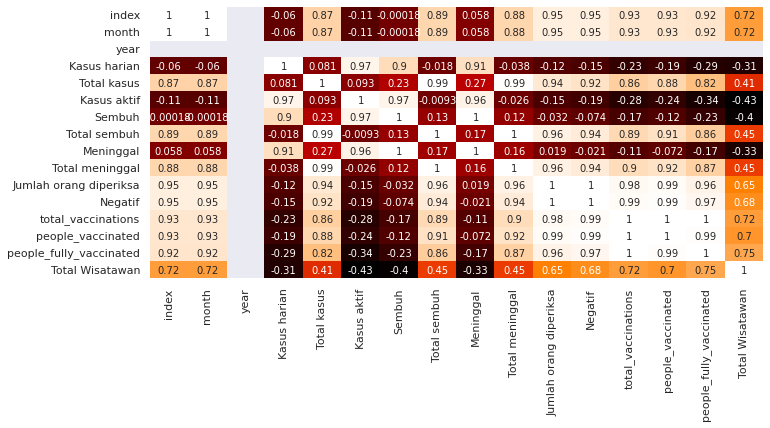

In [ ]:
plt.figure(figsize=(11,5))
sns.heatmap(df_result.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='gist_heat')
plt.show()

In [ ]:
df = df_result[['month', 'Negatif', 'Total kasus', 'Total sembuh', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'Total Wisatawan']]
df

,month,Negatif,Total kasus,Total sembuh,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
0,1,49074958,10071629,8167043,2805610,2745497,60113,126515
1,2,131034685,29139576,24376247,36106735,25305844,10800891,105788
2,3,168480100,37488335,33004792,186210476,130678121,55532355,119979
3,4,227435165,47761250,43234562,484717160,314469135,170248025,112756
4,5,271104219,54068447,49612324,723371137,438281787,285089350,139433
5,6,307768002,58774875,53049090,1008778684,649886340,358892344,126844
6,7,394317633,86065511,69710649,1723624814,1220885909,502738905,127249
7,8,495837997,118769332,103614304,2568740988,1691065399,877675589,118533
8,9,586453660,125168385,118218062,3594847508,2291907612,1302939896,120100
9,10,762373738,131209718,126147319,5198155307,3276730018,1921425289,146137


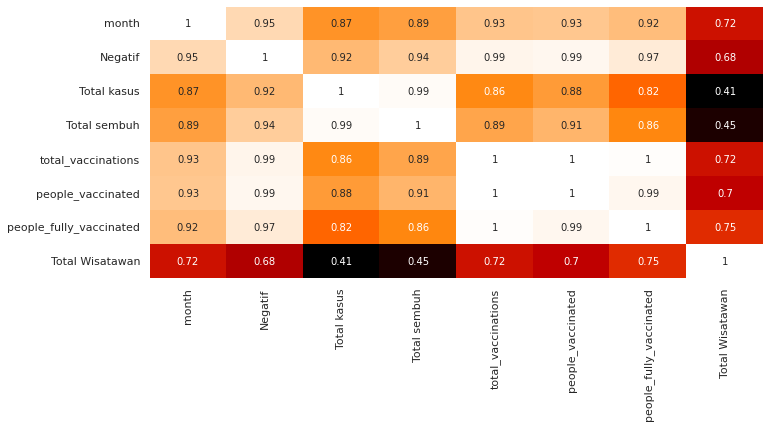

In [ ]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='gist_heat')
plt.show()

**Exploratory Data Analysis**

In [ ]:
df.describe()

,month,Negatif,Total kasus,Total sembuh,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000
mean,6.500000,4.112349e+08,7.558071e+07,6.917963e+07,2.224530e+09,1.393658e+09,8.308713e+08,129794.166667
std,3.605551,2.663136e+08,4.229222e+07,4.063275e+07,2.253579e+09,1.373604e+09,8.852061e+08,16910.724170
min,1.000000,4.907496e+07,1.007163e+07,8.167043e+06,2.805610e+06,2.745497e+06,6.011300e+04,105788.000000
25%,3.750000,2.126964e+08,4.519302e+07,4.067712e+07,4.100905e+08,2.685214e+08,1.415691e+08,119617.500000
50%,6.500000,3.510428e+08,6.984495e+07,6.137987e+07,1.366202e+09,9.353861e+08,4.308156e+08,126679.500000
75%,9.250000,6.029389e+08,1.203691e+08,1.072652e+08,3.870415e+09,2.409826e+09,1.457561e+09,141109.000000
max,12.000000,8.885440e+08,1.312097e+08,1.261473e+08,6.469882e+09,3.918364e+09,2.551519e+09,163619.000000


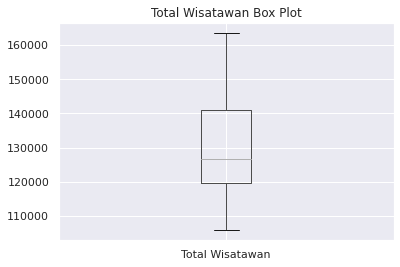

Maximum of Total Wisatawan :  163619
Median of Total Wisatawan :  126679.5
Minimum of Total Wisatawan :  105788


In [ ]:
df[['Total Wisatawan']].boxplot()
plt.title('Total Wisatawan Box Plot')
plt.show()

print('Maximum of Total Wisatawan : ', df['Total Wisatawan'].max())
print('Median of Total Wisatawan : ', df['Total Wisatawan'].median())
print('Minimum of Total Wisatawan : ', df['Total Wisatawan'].min())

**Top 5 Wisatawan per Month**

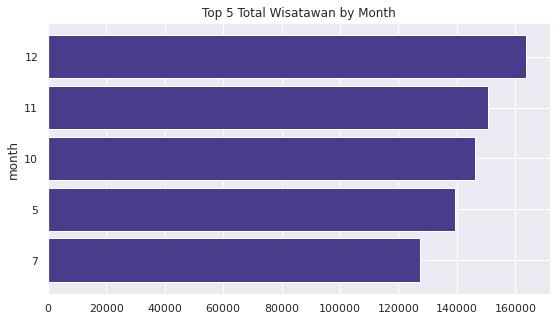

In [ ]:
import matplotlib.pyplot as plt
x = df.groupby('month')['Total Wisatawan'].mean().sort_values().tail(5)
x.plot(title ='Top 5 Total Wisatawan by Month', kind='barh', figsize=(9, 5), color='#483D8B', zorder=2, width=0.85)

In [ ]:
import plotly.express as px
fig = px.scatter(df, title="Perbandingan Total Kasus dan Total Sembuh COVID-19 di Indonesia", x="Total kasus", y="Total sembuh", color='Total sembuh')
fig.show()

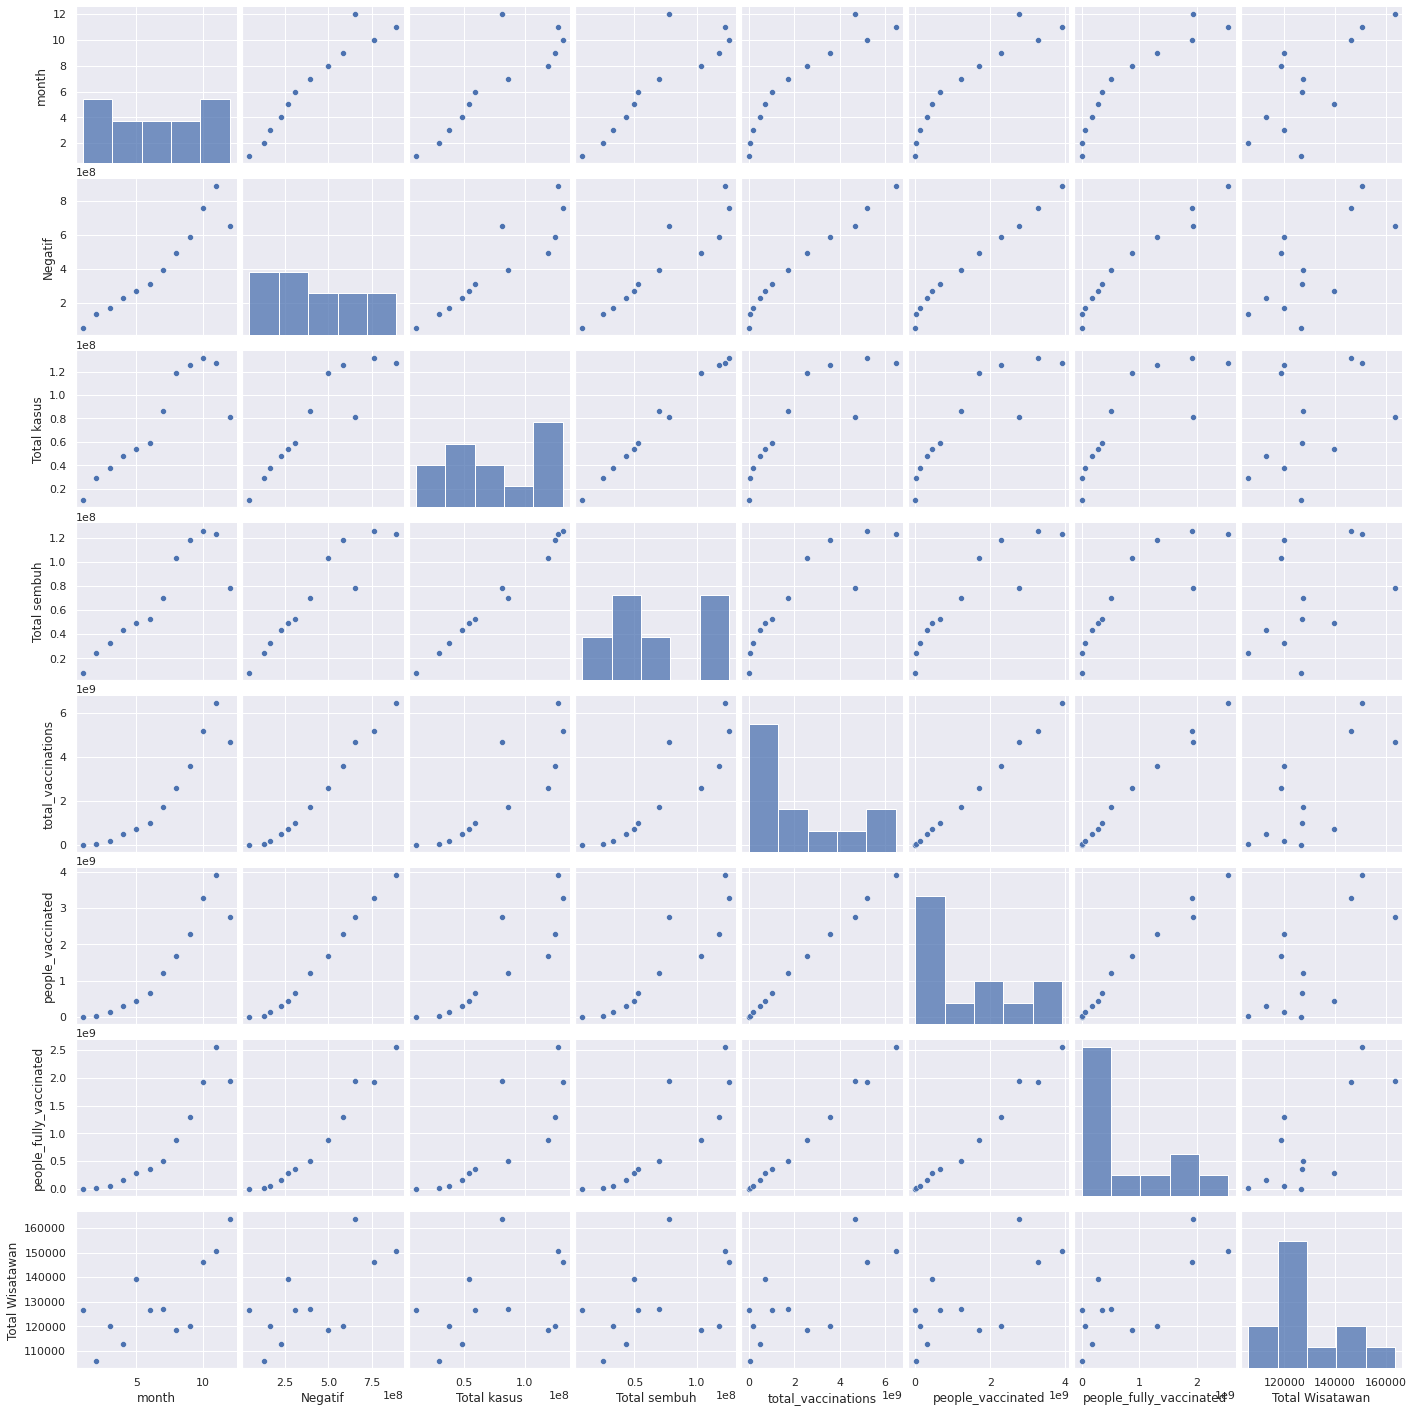

In [ ]:
import seaborn
seaborn.pairplot(df)

**Linear Regression**

**Pengaruh kasus dan vaksinasi COVID-19 di Indonesia terhadap jumlah wisatawan mancanegara yang datang ke Indonesia**



> **Split feature & target**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns='Total Wisatawan')
y = df['Total Wisatawan']



> **Build Model**






In [ ]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8279603017180894




> **Predict from Model**



In [ ]:
y_pred = model.predict(x)
df['Total Wisatawan Predict'] = y_pred
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month,Negatif,Total kasus,Total sembuh,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan,Total Wisatawan Predict
0,1,49074958,10071629,8167043,2805610,2745497,60113,126515,120190.662246
1,2,131034685,29139576,24376247,36106735,25305844,10800891,105788,115961.165917
2,3,168480100,37488335,33004792,186210476,130678121,55532355,119979,119013.197344
3,4,227435165,47761250,43234562,484717160,314469135,170248025,112756,121327.962089
4,5,271104219,54068447,49612324,723371137,438281787,285089350,139433,123587.430606
5,6,307768002,58774875,53049090,1008778684,649886340,358892344,126844,130284.704723
6,7,394317633,86065511,69710649,1723624814,1220885909,502738905,127249,127474.105310
7,8,495837997,118769332,103614304,2568740988,1691065399,877675589,118533,115067.185268
8,9,586453660,125168385,118218062,3594847508,2291907612,1302939896,120100,125938.560713
9,10,762373738,131209718,126147319,5198155307,3276730018,1921425289,146137,142673.014859


In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

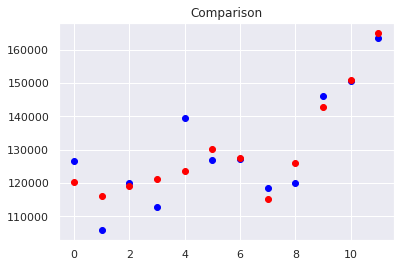

In [ ]:
plotGraph(df['Total Wisatawan'],df['Total Wisatawan Predict'], "Comparison")



> **Evaluasi prediksi jumlah wisatawan**



In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: {} ' .format(round(mean_absolute_error*0.1,4)))
    print('MSE: {} ' .format(round(mse*0.01,4)))
    print('RMSE: {} '.format(round(np.sqrt(mse)*0.1,4)))

In [ ]:
regression_results(y,y_pred)

explained_variance:  0.828
mean_squared_log_error:  0.003
r2:  0.828
MAE: 501.0918 
MSE: 450987.519 
RMSE: 671.556 




> **Summary Model Linear Regression**



In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
x = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
model = sm.OLS(y, x)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Total Wisatawan   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     4.011
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0745
Time:                        14:14:59   Log-Likelihood:                -122.77
No. Observations:                  12   AIC:                             259.5
Df Residuals:                       5   BIC:                             262.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



In [ ]:
print(f"coefficient of determination: {results.rsquared}")

coefficient of determination: 0.8279603017182329


In [ ]:
print(f"adjusted coefficient of determination: {results.rsquared_adj}")

adjusted coefficient of determination: 0.6215126637801123


In [ ]:
print(f"regression coefficients: {results.params}")

regression coefficients: const                      119965.236830
month                        4927.882197
Negatif                         0.000067
Total kasus                    -0.001245
Total sembuh                    0.000548
total_vaccinations             -0.045688
people_vaccinated               0.045719
people_fully_vaccinated         0.045644
dtype: float64


**Random Forest Regression**

In [ ]:
df1 = df_result[['month', 'Negatif', 'Total kasus', 'Total sembuh', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'Total Wisatawan']]
df1

,month,Negatif,Total kasus,Total sembuh,total_vaccinations,people_vaccinated,people_fully_vaccinated,Total Wisatawan
0,1,49074958,10071629,8167043,2805610,2745497,60113,126515
1,2,131034685,29139576,24376247,36106735,25305844,10800891,105788
2,3,168480100,37488335,33004792,186210476,130678121,55532355,119979
3,4,227435165,47761250,43234562,484717160,314469135,170248025,112756
4,5,271104219,54068447,49612324,723371137,438281787,285089350,139433
5,6,307768002,58774875,53049090,1008778684,649886340,358892344,126844
6,7,394317633,86065511,69710649,1723624814,1220885909,502738905,127249
7,8,495837997,118769332,103614304,2568740988,1691065399,877675589,118533
8,9,586453660,125168385,118218062,3594847508,2291907612,1302939896,120100
9,10,762373738,131209718,126147319,5198155307,3276730018,1921425289,146137


In [ ]:
x = df1.iloc[:, 0:6].values
y = df1.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: {}' .format(round(metrics.mean_absolute_error(y_test, y_pred)*0.1,4)))
print('Mean Squared Error: {}' .format(round(metrics.mean_squared_error(y_test, y_pred)*0.01,4)))
print('Root Mean Squared Error: {}' .format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))*0.1,4)))

Mean Absolute Error: 1929.1085
Mean Squared Error: 5097965.9907
Root Mean Squared Error: 2257.8676
